# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew British Airways on BA ...
1,✅ Trip Verified | BA cancelled the flight fro...
2,✅ Trip Verified | I strongly advise everyone t...
3,✅ Trip Verified | My partner and I were on the...
4,Not Verified | We had a Premium Economy retur...


In [5]:
df.to_csv("C:\\Users\\Bhavya Saini\\OneDrive\\Documents\\Desktop\\data\\BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
import pandas as pd

# Assuming your DataFrame is named df and the column you want to modify is named 'column_name'
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified |', '', regex=False)
# Display the modified DataFrame
print(df)


                                               reviews
0      Flew British Airways on BA 434 London Heathr...
1      BA cancelled the flight from Tokyo to LHR. I...
2     I strongly advise everyone to never fly Briti...
3     My partner and I were on the BA2166 return fl...
4      We had a Premium Economy return flight Los A...
..                                                 ...
995    Boston to London Heathrow, was excited to ex...
996    London to Cape Town in First and our first t...
997    This review is specifically aimed at the exc...
998    London to Aberdeen. Before boarding the flig...
999    Gatwick to Dubrovnik. Overcrowded lounges, b...

[1000 rows x 1 columns]


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['reviews'].apply(preprocess)


[nltk_data] Downloading package punkt to C:\Users\Bhavya
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Bhavya
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Basic statistics
print(df['cleaned_review'].describe())

# Length of reviews
df['review_length'] = df['cleaned_review'].apply(len)
print(df['review_length'].describe())


count                                                  1000
unique                                                 1000
top       flew british airways ba 434 london heathrow am...
freq                                                      1
Name: cleaned_review, dtype: object
count    1000.00000
mean      540.57700
std       371.32753
min        61.00000
25%       282.75000
50%       438.00000
75%       680.50000
max      2324.00000
Name: review_length, dtype: float64


In [9]:
print(df['cleaned_review'].head)

<bound method NDFrame.head of 0      flew british airways ba 434 london heathrow am...
1      ba cancelled flight tokyo lhr booked next day ...
2      strongly advise everyone never fly british air...
3      partner ba2166 return flight tampa gatwick exc...
4      premium economy return flight los angeles lond...
                             ...                        
995    boston london heathrow excited experience a380...
996    london cape town first first taste new soft pr...
997    review specifically aimed excellent cabin crew...
998    london aberdeen boarding flight forced check b...
999    gatwick dubrovnik overcrowded lounges business...
Name: cleaned_review, Length: 1000, dtype: object>


In [10]:
from collections import Counter

# Combine all reviews into one string
all_reviews = ' '.join(df['cleaned_review'])

# Split into words
words = all_reviews.split()

# Count word frequencies
word_freq = Counter(words)

# Most common words
print(word_freq.most_common(20))


[('flight', 1935), ('ba', 1226), ('service', 730), ('’', 597), ('time', 531), ('london', 509), ('seat', 456), ('crew', 451), ('class', 441), ('food', 434), ('british', 432), ('good', 426), ('one', 421), ('airways', 420), ('us', 414), ('business', 407), ('seats', 397), ('staff', 396), ('would', 377), ('get', 377)]


In [13]:
pip install textblob

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)
print(df[['reviews', 'sentiment']].head())


                                             reviews  sentiment
0    Flew British Airways on BA 434 London Heathr...   0.300962
1    BA cancelled the flight from Tokyo to LHR. I...  -0.063636
2   I strongly advise everyone to never fly Briti...  -0.014912
3   My partner and I were on the BA2166 return fl...   0.015278
4    We had a Premium Economy return flight Los A...  -0.044382


In [12]:
import gensim
from gensim import corpora

# Tokenize the reviews
tokenized_reviews = [review.split() for review in df['cleaned_review']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_reviews)

# Create a corpus: list of bags of words
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Build the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.010*"airways" + 0.010*"british" + 0.007*"flight" + 0.005*"london" + 0.005*"service"')
(1, '0.020*"flight" + 0.014*"ba" + 0.011*"good" + 0.010*"service" + 0.010*"food"')
(2, '0.017*"flight" + 0.016*"ba" + 0.006*"airways" + 0.006*"british" + 0.005*"london"')
(3, '0.020*"’" + 0.007*"crew" + 0.006*"service" + 0.005*"ba" + 0.004*"world"')
(4, '0.030*"flight" + 0.016*"ba" + 0.009*"us" + 0.009*"’" + 0.008*"service"')


In [16]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


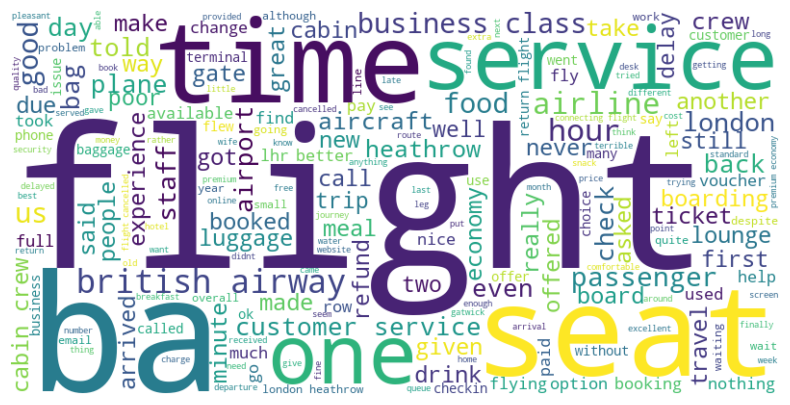

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


C:\Users\Bhavya Saini\OneDrive\Documents\Anaconda me\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


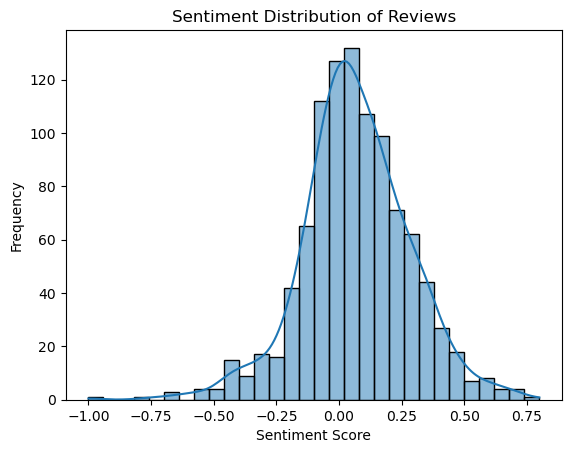

In [18]:
import seaborn as sns

sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()
